In [20]:
import math
from decimal import Decimal, getcontext
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Iterable

# Set the number of significant digits for the decimal calculations
getcontext().prec = 30


In [7]:
class Vector:
    """class Vector(iterable).
    Iterable must be a sequence, a container that supports iteration or an iterator object.

    The Vector class uses decimal floating point arithmetic, provided by Python's
    module 'decimal'.
    The decimal floating point accuracy can be defined by the user; default value is 30 significant digits.
    """

    def __init__(self, coordinates: Iterable, tolerance=Decimal('1e-15'), precision=30):
        try:
            if not coordinates:
                raise ValueError
            else:
                self.coordinates = tuple(Decimal(x) for x in coordinates)
                self.dimension = len(self.coordinates)
                self.tolerance = tolerance
                # Set the number of significant digits for the decimal calculations
                getcontext().prec = precision
        except ValueError:
            raise ValueError('Coordinates must be non-empty')
        except TypeError:
            raise TypeError('Coordinates must be an iterable')

    def __str__(self):
        """Return a string representation of the vector."""
        return 'Vector: {}'.format(self.coordinates)

    def __getitem__(self, i):
        """Make the vector indexable."""
        return self.coordinates[i]

    def __iter__(self):
        """Make the vector iterable."""
        return self.coordinates.__iter__()

    def __eq__(self, other):
        return self.coordinates == other.coordinates

    def __add__(self, other):
        return self.add(other)

    def __sub__(self, other):
        return self.subtract(other)

    def __rmul__(self, other):
        return self.__mul__(other)

    def __mul__(self, other):
        """Scalar multiplication or inner product (dot product).

        This method detects the attempted type of multiplication and returns the appropriate result.
        """
        if isinstance(other, (int, float, Decimal, str)):
            return Vector(x * Decimal(other) for x in self.coordinates)
        elif isinstance(other, Vector):
            return self.dot(other)
        else:
            return NotImplemented

    def add(self, other):
        return Vector(x + y for x, y in zip(self.coordinates, other.coordinates))

    def subtract(self, other):
        return Vector(x - y for x, y in zip(self.coordinates, other.coordinates))

    def dot(self, other):
        return sum(x * y for x, y in zip(self.coordinates, other.coordinates))

    def magnitude(self):
        """Return the magnitude of this vector.

        Uses the Decimal.sqrt() method provided by the decimal module to preserve the decimal accuracy.
        """
        return sum(x**2 for x in self.coordinates).sqrt()

    def normalized(self):
        """Return the normalization of this vector."""
        m = self.magnitude()
        if m.is_zero():
            raise ZeroDivisionError('Cannot normalize the zero vector')
        return Vector(x / m for x in self.coordinates)

    def is_zero(self):
        """Check if this vector is the zero vector within a specified tolerance."""
        return self.magnitude() < self.tolerance

    def angle_with(self, other, in_degrees=False):
        """Returns the angle θ between this vector and the 'other' vector.

        If in_degrees is True the angle is returned in degrees.
        """
        try:
            angle = math.acos(self.normalized() * other.normalized())
            if in_degrees:
                return math.degrees(angle)
            else:
                return angle
        except ZeroDivisionError:
            raise ArithmeticError('Cannot compute an angle with the zero vector')

    def is_orthogonal_to(self, other):
        """Check if this vector is orthogonal to the other vector within a specified tolerance."""
        return abs(self * other) < self.tolerance

    def is_parallel_to(self, other):
        """Check if this vector is parallel to the 'other' within a specified tolerance."""
        if self.is_zero() or other.is_zero():
            return True
        elif abs(abs(self * other) - self.magnitude() * other.magnitude()) < self.tolerance:
            return True
        else:
            return False

    def orthogonal_to(self, other):
        """Returns the orthogonal component of this vector to the 'other' vector."""
        try:
            return self - self.parallel_to(other)
        except ArithmeticError:
            raise ArithmeticError('No unique orthogonal component to zero vector')

    def parallel_to(self, other):
        """Return the parallel component (projection) of this vector to the 'other' vector."""
        try:
            norm_other = other.normalized()
            return (self * norm_other) * norm_other
        except ZeroDivisionError:
            raise ArithmeticError('No unique parallel component to zero vector')

    def cross(self, other):
        """Return the cross product of this vector to the 'other' vector.

        Note: Cross product is defined only in three dimensions.
        """
        if not (self.dimension == other.dimension == 3):
            raise Exception('Cross product is only defined in three dimensions')
        x = self.coordinates[1] * other.coordinates[2] - self.coordinates[2] * other.coordinates[1]
        y = -(self.coordinates[0] * other.coordinates[2] - self.coordinates[2] * other.coordinates[0])
        z = self.coordinates[0] * other.coordinates[1] - self.coordinates[1] * other.coordinates[0]
        return Vector([x, y, z])

In [9]:
def test_vector():
    a = Vector([1., 2., 0])
    b = Vector(['6.984', '-5.975', '4.778'])
    c = Vector(['0.0000000000000000001', '0.0000000000000001', 0])
    d = Vector([1, '2.00000000000000000000001', 0])
    f = Vector([0, 0])
    v = Vector(['8.462', '7.893', '-8.187'])
    z = Vector([0, 0, 0])

    print("\n***** TESTING VECTOR: *****\n")
    print("a = {}".format(a))
    print("||a|| = {}".format(a.magnitude()))

    print("b = {}".format(b))
    print("||b|| = {}".format(b.magnitude()))

    print("c = {}".format(c))
    print("||c|| = {}".format(c.magnitude()))

    print("d = {}".format(d))
    print("||d|| = {}".format(d.magnitude()))

    print("f = {}".format(f))
    print("||f|| = {}".format(f.magnitude()))

    print()
    print("a normalized: {}".format(a.normalized()))
    print("b normalized: {}".format(b.normalized()))
    # print("f normalized: {}".format(f.normalized()))

    print()
    print("a + b - c = {}".format(a + b - c))
    print("a + b - c = {}".format(a.add(b).subtract(c)))
    print("a * b = {}".format(a * b))
    print("a * b = {}".format(a.dot(b)))
    print("'0.1' * a * b = {}".format('.1' * a * b))

    print()
    print("Angle between a and c in radians: {}".format(a.angle_with(c)))
    print("Angle between a and c in degrees: {}".format(a.angle_with(c, in_degrees=True)))

    print()
    print("c is zero within a tolerance of 1e-15: {}".format(c.is_zero()))

    print()
    print("a is orthogonal to c within a tolerance of 1e-15: {}".format(a.is_orthogonal_to(c)))

    print()
    print("a is parallel to c within a tolerance of 1e-15: {}".format(a.is_parallel_to(c)))

    print()
    print("a is parallel to d within a tolerance of 1e-15: {}".format(a.is_parallel_to(d)))

    print()
    print("Parallel of v onto b: {}".format(v.parallel_to(b)))
    print("Orthogonal of v onto b: {}".format(v.orthogonal_to(b)))

    print()
    print("Cross product v x b = {}".format(v.cross(b)))

In [10]:
test_vector()


***** TESTING VECTOR: *****

a = Vector: (Decimal('1'), Decimal('2'), Decimal('0'))
||a|| = 2.23606797749978969640917366873
b = Vector: (Decimal('6.984'), Decimal('-5.975'), Decimal('4.778'))
||b|| = 10.3588689054355736643435336333
c = Vector: (Decimal('1E-19'), Decimal('1E-16'), Decimal('0'))
||c|| = 1.00000049999987500006249996094E-16
d = Vector: (Decimal('1'), Decimal('2.00000000000000000000001'), Decimal('0'))
||d|| = 2.23606797749978969640918261300
f = Vector: (Decimal('0'), Decimal('0'))
||f|| = 0

a normalized: Vector: (Decimal('0.447213595499957939281834733747'), Decimal('0.894427190999915878563669467493'), Decimal('0E+29'))
b normalized: Vector: (Decimal('0.674204883154309414298565594013'), Decimal('-0.576800426238115514094205244019'), Decimal('0.461247269718111452107466553293'))

a + b - c = Vector: (Decimal('7.9839999999999999999'), Decimal('-3.9750000000000001'), Decimal('4.778'))
a + b - c = Vector: (Decimal('7.9839999999999999999'), Decimal('-3.9750000000000001'), Decima

In [8]:
class MyDecimal(Decimal):
    
    def is_near_zero(self, eps=Decimal('1e-15')):
        return abs(self) < eps

In [21]:
class Line:
    """Line([normal_vector[, constant_term, tolerance]]).

    Construct a 2-d Line object from:
    - normal_vector, a two-dimensional Vector object (the line's normal vector)
    - constant_term, a number (int, long, float), a Decimal number or a string
    - tolerance, a Decimal tolerance for equality comparisons. Defaults to 1e-15
    """

    NO_NONZERO_ELTS_FOUND_MSG = 'No non-zero elements found'

    def __init__(self, normal_vector=None, constant_term=None, tolerance=Decimal('1e-15')):
        self.tolerance = tolerance
        self.dimension = 2
        if not normal_vector:
            normal_vector = Vector([0 for _ in range(self.dimension)], tolerance=self.tolerance)
        self.normal_vector = normal_vector
        if not constant_term:
            constant_term = Decimal(0)
        self.constant_term = Decimal(constant_term)
        self.set_basepoint()

    def set_basepoint(self):
        """Calculate a base point for the line."""
        try:
            basepoint_coords = ['0' for _ in range(self.dimension)]
            initial_index = self.first_nonzero_index()
            initial_coefficient = self.normal_vector[initial_index]
            basepoint_coords[initial_index] = self.constant_term / initial_coefficient
            self.base_point = Vector(basepoint_coords)
        except Exception as e:
            if str(e) == Line.NO_NONZERO_ELTS_FOUND_MSG:
                self.base_point = None
            else:
                raise

    def first_nonzero_index(self):
        for position, item in enumerate(self.normal_vector):
            if not abs(item) < self.tolerance:
                return position
        raise Exception(Line.NO_NONZERO_ELTS_FOUND_MSG)

    def __str__(self):
        """Return a string representation of this line."""
        def write_coefficient(coefficient, is_initial_term=False):
            coefficient = round(coefficient, num_decimal_places)
            if coefficient % 1 == 0:
                coefficient = int(coefficient)
            output = ''
            if coefficient < 0:
                output += '-'
            if coefficient > 0 and not is_initial_term:
                output += '+'
            if not is_initial_term:
                output += ' '
            if abs(coefficient) != 1:
                output += '{}'.format(abs(coefficient))
            return output

        num_decimal_places = 3
        n = self.normal_vector
        try:
            initial_index = self.first_nonzero_index()
            terms = [write_coefficient(n[i], is_initial_term=(i == initial_index)) + 'x_{}'.format(i + 1)
                     for i in range(self.dimension) if round(n[i], num_decimal_places) != 0]
            output = ' '.join(terms)
        except Exception as e:
            if str(e) == self.NO_NONZERO_ELTS_FOUND_MSG:
                output = '0'
            else:
                raise
        constant = round(self.constant_term, num_decimal_places)
        if constant % 1 == 0:
            constant = int(constant)
        output += ' = {}'.format(constant)
        return output

    def is_parallel_to(self, other):
        """Check if this line is parallel to the 'other' line within the specified tolerance."""
        return self.normal_vector.is_parallel_to(other.normal_vector)

    def __eq__(self, other):
        """Check if this line is equal to the 'other' line within the specified tolerance."""
        # To be equal the two lines must first be parallel:
        if self.is_parallel_to(other):
            # First check the edge cases of zero normal vectors
            if self.normal_vector.is_zero():
                if not other.normal_vector.is_zero():
                    return False
                else:
                    diff = self.constant_term - other.constant_term
                    return abs(diff) < self.tolerance
            elif other.normal_vector.is_zero():
                return False
            # Both normal vectors are non-zero. Check the connecting vector of the two lines
            connecting_vector = self.base_point - other.base_point
            if connecting_vector.is_zero() or connecting_vector.is_orthogonal_to(self.normal_vector):
                return True
        return False

    def intersection(self, other):
        """Return the intersection of this line with the 'other' line.

        - If lines are parallel the method returns None.
        - If lines are equal the method returns self."""
        if self == other:
            return self
        elif self.is_parallel_to(other):
            return None
        else:
            a, b, c = self.normal_vector[0], self.normal_vector[1], self.constant_term
            d, e, f = other.normal_vector[0], other.normal_vector[1], other.constant_term
            x = (c * e - b * f) / (a * e - b * d)
            y = (a * f - d * c) / (a * e - b * d)
            return x, y


In [22]:
def test_line():
    l1 = Line(normal_vector=Vector(['10.115', '7.09']), constant_term='0.1')
    l2 = Line(normal_vector=Vector(['10.115', '7.09']), constant_term='3.025')
    l3 = Line(normal_vector=Vector(['7.204', '3.182']), constant_term='8.68')
    l4 = Line(normal_vector=Vector(['8.172', '4.114']), constant_term='9.883')
    l5 = Line(normal_vector=Vector(['1.182', '5.562']), constant_term='6.744')
    l6 = Line(normal_vector=Vector(['1.773', '8.343']), constant_term='9.525')

    print("\n***** TESTING LINE: *****\n")
    print("Line 1: {}".format(l1))
    print("Line 2: {}".format(l2))
    print("Line 3: {}".format(l3))
    print("Line 4: {}".format(l4))
    print("Line 5: {}".format(l5))
    print("Line 6: {}".format(l6))
    print()
    print("Line 1 is parallel to line 2: {}".format(l1.is_parallel_to(l2)))
    print()
    print("Line 1 is equal to line 2: {}".format(l1 == l2))
    print()
    print("Line 1 intersection with line 2: {}".format(l1.intersection(l2)))
    print()
    print("Line 3 intersection with line 4: {}".format(l3.intersection(l4)))
    print()
    print("Line 5 intersection with line 6: {}".format(l5.intersection(l6)))
    print()
    print("Line 6 intersection with line 6: {}".format(l6.intersection(l6)))
    

In [23]:
test_line()


***** TESTING LINE: *****

Line 1: 10.115x_1 + 7.090x_2 = 0.100
Line 2: 10.115x_1 + 7.090x_2 = 3.025
Line 3: 7.204x_1 + 3.182x_2 = 8.680
Line 4: 8.172x_1 + 4.114x_2 = 9.883
Line 5: 1.182x_1 + 5.562x_2 = 6.744
Line 6: 1.773x_1 + 8.343x_2 = 9.525

Line 1 is parallel to line 2: True

Line 1 is equal to line 2: False

Line 1 intersection with line 2: None

Line 3 intersection with line 4: (Decimal('1.17277663546464014934704696154'), Decimal('0.0726955116633351238541400656916'))

Line 5 intersection with line 6: None

Line 6 intersection with line 6: 1.773x_1 + 8.343x_2 = 9.525


In [44]:
class Plane:
    """class Plane([normal_vector[, constant_term]]).
    
    Construct a Plane object from the keyword arguments:
    - normal_vector, a three-dimensional Vector object (the plane's normal vector)
    - constant_term, a number (int, long, float), a Decimal number or a string
    """

    NO_NONZERO_ELTS_FOUND_MSG = 'No nonzero elements found'

    def __init__(self, normal_vector=None, constant_term=None, tolerance=Decimal('1e-15')):
        self.dimension = 3
        self.tolerance = tolerance
        if not normal_vector:
            all_zeros = ['0' for _ in range(self.dimension)]
            normal_vector = Vector(all_zeros, tolerance=self.tolerance)
        self.normal_vector = normal_vector
        if not constant_term:
            constant_term = Decimal('0')
        self.constant_term = Decimal(constant_term)
        self.set_basepoint()

    def set_basepoint(self):
        try:
            n = self.normal_vector
            c = self.constant_term
            basepoint_coords = ['0' for _ in range(self.dimension)]
            initial_index = Plane.first_nonzero_index(n)
            initial_coefficient = n[initial_index]
            basepoint_coords[initial_index] = c / initial_coefficient
            self.basepoint = Vector(basepoint_coords)
        except Exception as e:
            if str(e) == Plane.NO_NONZERO_ELTS_FOUND_MSG:
                self.basepoint = None
            else:
                raise

    @staticmethod
    def first_nonzero_index(iterable):
        for position, item in enumerate(iterable):
            if not MyDecimal(item).is_near_zero():
                return position
        raise Exception(Plane.NO_NONZERO_ELTS_FOUND_MSG)
                
    def __str__(self):
        def write_coefficient(coefficient, is_initial_term=False):
            coefficient = round(coefficient, num_decimal_places)
            if coefficient % 1 == 0:
                coefficient = int(coefficient)
            output = ''
            if coefficient < 0:
                output += '-'
            if coefficient > 0 and not is_initial_term:
                output += '+'
            if not is_initial_term:
                output += ' '
            if abs(coefficient) != 1:
                output += '{}'.format(abs(coefficient))
            return output

        num_decimal_places = 3
        n = self.normal_vector
        try:
            initial_index = Plane.first_nonzero_index(n)
            terms = [write_coefficient(n[i], is_initial_term=(i==initial_index)) + 'x_{}'.format(i+1)
                     for i in range(self.dimension) if round(n[i], num_decimal_places) != 0]
            output = ' '.join(terms)
        except Exception as e:
            if str(e) == self.NO_NONZERO_ELTS_FOUND_MSG:
                output = '0'
            else:
                raise 
        constant = round(self.constant_term, num_decimal_places)
        if constant % 1 == 0:
            constant = int(constant)
        output += ' = {}'.format(constant)
        return output
    
    def is_parallel_to(self, other):
        """Checks if plane is parallel to the 'other' plane within given tolerance."""
        return self.normal_vector.is_parallel_to(other.normal_vector)
    
    def __eq__(self, other):
        """Checks if plane is equal to the 'other' plane within given tolerance."""
        # To be equal the two planes must first be parallel:
        if self.is_parallel_to(other):
            # First check the edge cases of zero normal vectors
            if self.normal_vector.is_zero():
                if not other.normal_vector.is_zero():
                    return False
                else:
                    diff = self.constant_term - other.constant_term
                    return MyDecimal(diff).is_near_zero(eps=self.tolerance)
            elif other.normal_vector.is_zero():
                return False
            # Both normal vectors are non-zero. Check the connecting vector of the two lines
            connecting_vector = self.basepoint - other.basepoint
            if (connecting_vector.is_zero() or 
                connecting_vector.is_orthogonal_to(self.normal_vector)):
                return True
        return False
    
    def plot(self):
        """Draws a 3d-plot of the plane."""
        x_term, y_term, z_term = tuple([float(value) for value in self.normal_vector])
        constant_term = float(self.constant_term)
        limit = constant_term * 3
        x = np.linspace(-limit, limit)
        y = np.linspace(-limit, limit)
        x, y = np.meshgrid(x, y)
        z = (constant_term - x_term * x - y_term * y) / z_term
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.plot_surface(x, y, z, rstride=1, cstride=1)
        plt.show()
        

In [45]:
def test_plane():
    p1 = Plane(normal_vector=Vector(['-0.412', '3.806', '0.728']), constant_term='-3.46')
    p2 = Plane(normal_vector=Vector(['1.03', '-9.515', '-1.82']), constant_term='8.65')
    p3 = Plane(normal_vector=Vector(['2.611', '5.528', '0.283']), constant_term='4.6')
    p4 = Plane(normal_vector=Vector(['7.715', '8.306', '5.342']), constant_term='3.76')
    p5 = Plane(normal_vector=Vector(['-7.926', '8.625', '-7.212']), constant_term='-7.952')
    p6 = Plane(normal_vector=Vector(['-2.642', '2.875', '-2.404']), constant_term='-2.443')
    print("\n***** TESTING PLANE: *****\n")
    print("Plane 1: {}".format(p1))
    print("Plane 2: {}".format(p2))
    print("Plane 1 is parallel to plane 2: {}".format(p1.is_parallel_to(p2)))
    print("Plane 1 is equal to plane 2: {}".format(p1 == p2))
    print()
    print("Plane 3: {}".format(p3))
    print("Plane 4: {}".format(p4))
    print("Plane 3 is parallel to plane 4: {}".format(p3.is_parallel_to(p4)))
    print("Plane 3 is equal to plane 4: {}".format(p3 == p4))
    print()
    print("Plane 5: {}".format(p5))
    print("Plane 6: {}".format(p6))
    print("Plane 5 is parallel to plane 6: {}".format(p5.is_parallel_to(p6)))
    print("Plane 5 is equal to plane 6: {}".format(p5 == p6))
    
    p1.plot()
    p3.plot()
    


***** TESTING PLANE: *****

Plane 1: -0.412x_1 + 3.806x_2 + 0.728x_3 = -3.460
Plane 2: 1.030x_1 - 9.515x_2 - 1.820x_3 = 8.650
Plane 1 is parallel to plane 2: True
Plane 1 is equal to plane 2: True

Plane 3: 2.611x_1 + 5.528x_2 + 0.283x_3 = 4.600
Plane 4: 7.715x_1 + 8.306x_2 + 5.342x_3 = 3.760
Plane 3 is parallel to plane 4: False
Plane 3 is equal to plane 4: False

Plane 5: -7.926x_1 + 8.625x_2 - 7.212x_3 = -7.952
Plane 6: -2.642x_1 + 2.875x_2 - 2.404x_3 = -2.443
Plane 5 is parallel to plane 6: True
Plane 5 is equal to plane 6: False


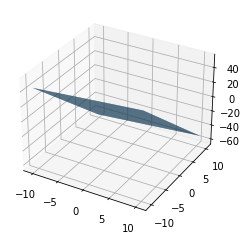

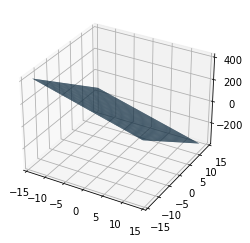

In [46]:
test_plane()    

In [47]:
class LinearSystem:
    """class LinearSystem(planes).
    
    Argument 'planes' must be a list of Plane objects.
    """

    ALL_PLANES_MUST_BE_IN_SAME_DIM_MSG = 'All planes in the system should live in the same dimension'
    NO_SOLUTIONS_MSG = 'No solutions'
    INF_SOLUTIONS_MSG = 'Infinitely many solutions'

    def __init__(self, planes):
        try:
            d = planes[0].dimension
            for p in planes:
                assert p.dimension == d
            self.planes = planes
            self.dimension = d
        except AssertionError:
            raise Exception(self.ALL_PLANES_MUST_BE_IN_SAME_DIM_MSG)
    
    def __len__(self):
        """Returns the number of Planes (equations) in the system."""
        return len(self.planes)

    def __getitem__(self, key):
        """Called to implement evaluation of self[key]."""
        return self.planes[key]

    def __setitem__(self, key, value):
        """Called to implement assignment of value to self[key]."""
        try:
            assert value.dimension == self.dimension
            self.planes[key] = value
        except AssertionError:
            raise Exception(self.ALL_PLANES_MUST_BE_IN_SAME_DIM_MSG)

    def __str__(self):
        """Returns a nice representation of the LinearSystem for print."""
        ret = 'Linear System:\n'
        temp = ['Equation {}: {}'.format(i+1, p) for i, p in enumerate(self.planes)]
        ret += '\n'.join(temp)
        return ret
    
    def indices_of_first_nonzero_terms_in_each_row(self):
        """Returns the index (position) of the first non-zero term of each equation
        in the system.
        If no non-zero term is found, the method returns -1."""
        num_equations = len(self)
        num_variables = self.dimension
        indices = [-1] * num_equations
        for i, plane in enumerate(self.planes):
            try:
                indices[i] = plane.first_nonzero_index(plane.normal_vector)
            except Exception as e:
                if str(e) == Plane.NO_NONZERO_ELTS_FOUND_MSG:
                    continue
                else:
                    raise
        return indices

    def swap_rows(self, row1, row2):
        """Swaps the position of two equations of the linear system."""
        self[row1], self[row2] = self[row2], self[row1]
        
    def multiply_coefficient_and_row(self, coefficient, row):
        """Multiply an equation of the linear system by a constant."""
        nv = coefficient * self[row].normal_vector
        ct = coefficient * self[row].constant_term
        self[row] = Plane(normal_vector=nv, constant_term=ct)

    def add_multiple_times_row_to_row(self, coefficient, row_to_add, row_to_be_added_to):
        nv = coefficient * self[row_to_add].normal_vector + self[row_to_be_added_to].normal_vector
        ct = coefficient * self[row_to_add].constant_term + self[row_to_be_added_to].constant_term
        self[row_to_be_added_to] = Plane(normal_vector=nv, constant_term=ct)

    def compute_triangular_form(self):
        """Returns a triangular form of the linear system.
        
        Algorithm:
        1. Create a copy of the original linear system
        2. For the first n equations in the system, where n equals to max(planes dimension, no. of equations):
             Record the position of the first non-zero coefficient for each equation
             if the first non-zero index is (less than or equal) to the (equation index) and not equal to -1:
               continue to the next equation
             else:
               for each remaining equation check if it satisfies above condition:
                 if yes swap equations
                 break from inner loop
        3. For each equation in the system:
             Record the position of the first non-zero coefficient for each equation
             while True:
               if the first non-zero index is (less than) the (equation index) and not equal to -1:
                 find the first preceding equation that has the same first non-zero index
                 multiply found equation and add to eliminate the first term
               else:
                 break the while loop
        4. Return the triangular form calculated as per above steps
        """
        system = copy.deepcopy(self)
                        
        for row in range(len(system)):
            not_finished_with_equation = True
            
            while not_finished_with_equation:
                fnzt = system.indices_of_first_nonzero_terms_in_each_row()
                
                if fnzt[row] == row:
                    not_finished_with_equation = False
                
                elif fnzt[row] > row:
                    for next_row in range(row + 1, len(system)):
                        if fnzt[next_row] <= row and fnzt[next_row] != -1:
                            system.swap_rows(row, next_row)
                            break
                        
                elif fnzt[row] < row and fnzt[row] != -1:
                    for previous_row in range(row):
                        if fnzt[previous_row] == fnzt[row]:
                            coeff = - (system[row].normal_vector[fnzt[row]] / 
                                     system[previous_row].normal_vector[fnzt[previous_row]])          
                            system.add_multiple_times_row_to_row(coeff, previous_row, row)
                            # Term eliminated, break the for loop and check if can elimate next term
                            break
                    else:
                        # No suitable equation found, terminate the while loop
                        not_finished_with_equation = False
                
                else:
                    not_finished_with_equation = False
        
        return system
        

In [49]:
def test_linsys():
    p0 = Plane(normal_vector=Vector(['1', '1', '1']), constant_term='100')
    p1 = Plane(normal_vector=Vector(['0', '1', '0']), constant_term='2')
    p2 = Plane(normal_vector=Vector(['1', '1', '-1']), constant_term='3')
    p3 = Plane(normal_vector=Vector(['1', '0', '-2']), constant_term='2')
    s = LinearSystem([p0, p1, p2, p3])
    
    print(s)
    print()
    print("Number or equations in the system: {}".format(len(s)))
    print("Position of the first non-zero term for each equation: {}".format(s.indices_of_first_nonzero_terms_in_each_row()))
    print()
    print("Setting Equation 1 to be equal to Equation 2. The new system is:")
    s[0] = p1
    print(s)
    p0.plot()
    
    p0 = Plane(normal_vector=Vector(['1', '1', '1']), constant_term='1')
    p1 = Plane(normal_vector=Vector(['0', '1', '0']), constant_term='2')
    p2 = Plane(normal_vector=Vector(['1', '1', '-1']), constant_term='3')
    p3 = Plane(normal_vector=Vector(['1', '0', '-2']), constant_term='2')

    s = LinearSystem([p0, p1, p2, p3])
    s.swap_rows(0, 1)
    if not (s[0] == p1 and s[1] == p0 and s[2] == p2 and s[3] == p3):
        print('test case 1 failed')

    s.swap_rows(1, 3)
    if not (s[0] == p1 and s[1] == p3 and s[2] == p2 and s[3] == p0):
        print('test case 2 failed')

    s.swap_rows(3, 1)
    if not (s[0] == p1 and s[1] == p0 and s[2] == p2 and s[3] == p3):
        print('test case 3 failed')

    s.multiply_coefficient_and_row(1, 0)
    if not (s[0] == p1 and s[1] == p0 and s[2] == p2 and s[3] == p3):
        print('test case 4 failed')

    s.multiply_coefficient_and_row(-1, 2)
    if not (s[0] == p1 and
        s[1] == p0 and
        s[2] == Plane(normal_vector=Vector(['-1', '-1', '1']), constant_term='-3') and
        s[3] == p3):
        print('test case 5 failed')

    s.multiply_coefficient_and_row(10, 1)
    if not (s[0] == p1 and
        s[1] == Plane(normal_vector=Vector(['10', '10', '10']), constant_term='10') and
        s[2] == Plane(normal_vector=Vector(['-1', '-1', '1']), constant_term='-3') and
        s[3] == p3):
        print('test case 6 failed')

    s.add_multiple_times_row_to_row(0, 0, 1)
    if not (s[0] == p1 and
            s[1] == Plane(normal_vector=Vector(['10', '10', '10']), constant_term='10') and
            s[2] == Plane(normal_vector=Vector(['-1', '-1', '1']), constant_term='-3') and
            s[3] == p3):
        print('test case 7 failed')

    s.add_multiple_times_row_to_row(1, 0, 1)
    if not (s[0] == p1 and
        s[1] == Plane(normal_vector=Vector(['10', '11', '10']), constant_term='12') and
        s[2] == Plane(normal_vector=Vector(['-1', '-1', '1']), constant_term='-3') and
        s[3] == p3):
        print('test case 8 failed')

    s.add_multiple_times_row_to_row(-1, 1, 0)
    if not (s[0] == Plane(normal_vector=Vector(['-10', '-10', '-10']), constant_term='-10') and
        s[1] == Plane(normal_vector=Vector(['10', '11', '10']), constant_term='12') and
        s[2] == Plane(normal_vector=Vector(['-1', '-1', '1']), constant_term='-3') and
        s[3] == p3):
        print('test case 9 failed')
        

Linear System:
Equation 1: x_1 + x_2 + x_3 = 100
Equation 2: x_2 = 2
Equation 3: x_1 + x_2 - x_3 = 3
Equation 4: x_1 - 2x_3 = 2

Number or equations in the system: 4
Position of the first non-zero term for each equation: [0, 1, 0, 0]

Setting Equation 1 to be equal to Equation 2. The new system is:
Linear System:
Equation 1: x_2 = 2
Equation 2: x_2 = 2
Equation 3: x_1 + x_2 - x_3 = 3
Equation 4: x_1 - 2x_3 = 2


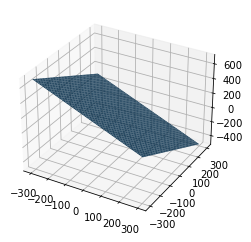

In [50]:
test_linsys()

In [56]:
p1 = Plane(normal_vector=Vector(['1', '1', '1']), constant_term='1')
p2 = Plane(normal_vector=Vector(['0', '1', '1']), constant_term='2')
s = LinearSystem([p1, p2])
t = s.compute_triangular_form()

print(t)
if not (t[0] == p1 and t[1] == p2):
    print('test case 1 failed')
else:
    print('test case 1 passed')

p1 = Plane(normal_vector=Vector(['1', '1', '1']), constant_term='1')
p2 = Plane(normal_vector=Vector(['1', '1', '1']), constant_term='2')
s = LinearSystem([p1, p2])
t = s.compute_triangular_form()
print()
print(t)
if not (t[0] == p1 and t[1] == Plane(constant_term='1')):
    print('test case 2 failed')
else:
    print('test case 2 passed')

p1 = Plane(normal_vector=Vector(['1', '1', '1']), constant_term='1')
p2 = Plane(normal_vector=Vector(['0', '1', '0']), constant_term='2')
p3 = Plane(normal_vector=Vector(['1', '1', '-1']), constant_term='3')
p4 = Plane(normal_vector=Vector(['1', '0', '-2']), constant_term='2')
s = LinearSystem([p1, p2, p3, p4])
t = s.compute_triangular_form()
print()
print(t)
if not (t[0] == p1 and
        t[1] == p2 and
        t[2] == Plane(normal_vector=Vector(['0', '0', '-2']), constant_term='2') and
        t[3] == Plane()):
    print('test case 3 failed')
else:
    print('test case 3 passed')

p1 = Plane(normal_vector=Vector(['0', '1', '1']), constant_term='1')
p2 = Plane(normal_vector=Vector(['1', '-1', '1']), constant_term='2')
p3 = Plane(normal_vector=Vector(['1', '2', '-5']), constant_term='3')
s = LinearSystem([p1, p2, p3])
t = s.compute_triangular_form()
print()
print(t)
if not (t[0] == Plane(normal_vector=Vector(['1', '-1', '1']), constant_term='2') and
        t[1] == Plane(normal_vector=Vector(['0', '1', '1']), constant_term='1') and
        t[2] == Plane(normal_vector=Vector(['0', '0', '-9']), constant_term='-2')):
    print('test case 4 failed')
else:
    print('test case 4 passed')
    

Linear System:
Equation 1: x_1 + x_2 + x_3 = 1
Equation 2: x_2 + x_3 = 2
test case 1 passed

Linear System:
Equation 1: x_1 + x_2 + x_3 = 1
Equation 2: 0 = 1
test case 2 passed

Linear System:
Equation 1: x_1 + x_2 + x_3 = 1
Equation 2: x_2 = 2
Equation 3: -2x_3 = 2
Equation 4: 0 = 0
test case 3 passed

Linear System:
Equation 1: x_1 - x_2 + x_3 = 2
Equation 2: x_2 + x_3 = 1
Equation 3: -9x_3 = -2
test case 4 passed
